In [9]:
import pandas as pd

df = pd.read_csv(r'C:\Users\nelso\Documents\Master Thesis\method_i\datasets_for_analysis\notes_dataset_verified.csv')

In [10]:
# Filter notes citing European fact-checkers
european_fact_checker_notes = df[(df['noteFromEFCSN'] == 1) | (df['noteFromEDMO'] == 1)]

# Filter notes citing other sources
other_source_notes = df[(df['noteFromEFCSN'] == 0) & (df['noteFromEDMO'] == 0)]

# Select columns with reasons for proposing a note (indices 3 to 14)
reason_columns = df.columns[3:15]

# Calculate the distribution of reasons for European fact-checker notes
european_distribution = european_fact_checker_notes[reason_columns].sum()

# Calculate the distribution of reasons for other source notes
other_distribution = other_source_notes[reason_columns].sum()

# Normalize the distributions to percentages
european_distribution_percentage = (european_distribution / european_distribution.sum()) * 100
other_distribution_percentage = (other_distribution / other_distribution.sum()) * 100

# Display the distributions
print("Distribution of reasons for European fact-checker notes:")
print(european_distribution_percentage)

print("\nDistribution of reasons for other source notes:")
print(other_distribution_percentage)

Distribution of reasons for European fact-checker notes:
misleadingOther                            2.872110
misleadingFactualError                    27.537934
misleadingManipulatedMedia                 7.388006
misleadingOutdatedInformation              9.826590
misleadingMissingImportantContext         28.477240
misleadingUnverifiedClaimAsFact           19.048049
misleadingSatire                           2.790824
notMisleadingOther                         0.234827
notMisleadingFactuallyCorrect              1.363801
notMisleadingOutdatedButNotWhenWritten     0.081286
notMisleadingClearlySatire                 0.081286
notMisleadingPersonalOpinion               0.298049
dtype: float64

Distribution of reasons for other source notes:
misleadingOther                            6.153638
misleadingFactualError                    26.107281
misleadingManipulatedMedia                 3.966761
misleadingOutdatedInformation              9.791368
misleadingMissingImportantContext         28.05

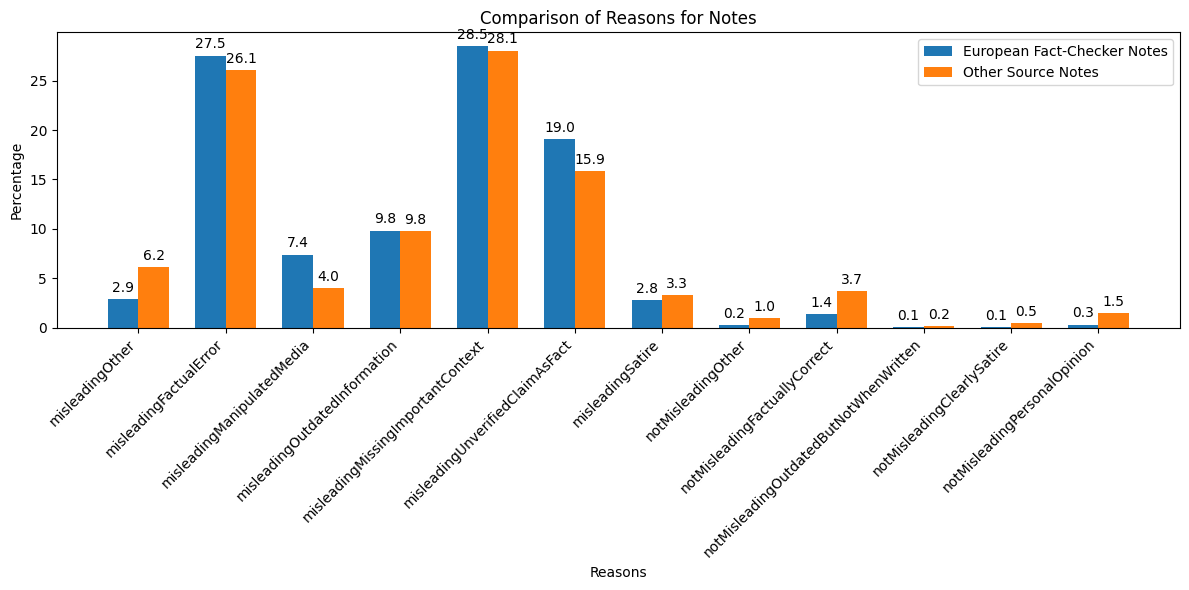

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

# Combine the two distributions into a DataFrame for easier plotting
comparison_df = pd.DataFrame({
    'European Fact-Checker Notes': european_distribution_percentage,
    'Other Source Notes': other_distribution_percentage
})

# Normalize the data for better visualization (optional)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(comparison_df)
comparison_df_normalized = pd.DataFrame(normalized_data, columns=comparison_df.columns, index=comparison_df.index)

# Plot the data
x = np.arange(len(comparison_df.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, comparison_df['European Fact-Checker Notes'], width, label='European Fact-Checker Notes')
bars2 = ax.bar(x + width/2, comparison_df['Other Source Notes'], width, label='Other Source Notes')

# Add labels, title, and legend
ax.set_xlabel('Reasons')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Reasons for Notes')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df.index, rotation=45, ha='right')
ax.legend()

# Add value annotations on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()